In [7]:
%reset -f
%reload_ext autoreload
%autoreload 2

import os
import sys
import importlib
import numpy as np
import pandas as pd

# Set root directory dynamically
ROOT_DIR = r'C:\Users\edens\Documents\GitHub\LabCode\MolFeatures'
sys.path.append(ROOT_DIR)
os.chdir(ROOT_DIR)
sys.path.append('M3_modeler')
sys.path.append('M2_data_extractor')
# Remove old module from cache
sys.modules.pop('data_extractor', None)
# Import modules and reload
try:
    
    os.chdir('M2_data_extractor')
    from data_extractor import Molecules, extract_connectivity
    from feather_extractor import logs_to_feather
    import data_extractor
    import feather_extractor
    import gaussian_handler
    from gaussian_handler import feather_file_handler
    os.chdir('../utils')
    from help_functions import dict_to_horizontal_df, get_df_from_file
    import visualize
    import help_functions
    os.chdir('../M3_modeler')
    from modeling import (
        ClassificationModel,
        LinearRegressionModel,
        fit_and_evaluate_single_combination_regression,
        fit_and_evaluate_single_combination_classification
    )
    import plot
    import modeling


    
    
    
except ModuleNotFoundError as e:
    print(f"Error: {e}")
    print("Make sure the module is in the correct directory and the Python environment is set up properly.")

# Ensure Pandas displays all columns
pd.set_option('display.max_columns', None)

# Define paths
log_files_path = None  # Example: r'C:\Users\edens\Documents\GitHub\LabCode\MolFeatures\Blackwell_logs'
if log_files_path:
    logs_to_feather(log_files_path)

# feather_path = r'C:\Users\edens\Documents\GitHub\lucas_project\new_logs_hirshfeld\new_feather'
feather_path=r'C:\Users\edens\Documents\GitHub\smiles_data\Nadeem_feathers'
# feather_path=r'C:\Users\edens\Documents\GitHub\lucas_project\Doyle2021\logfiles\feather_files'
os.chdir(feather_path)

# Load molecular data
mols = data_extractor.Molecules(feather_path)

questions = [
                "Ring Vibration atoms - by order -> Pick primary atom and para to it: \n example: 13,17",
                "Stretch Vibration atoms- enter bonded atom pairs: \n example: 1,2 4,5",
                "Strech Threshold - default is 1600 for carbonyl stretch",
                "Bending Vibration atoms - enter atom pairs that have a common atom: \n example: 4,7",
                "Bending_ Threshold - default is 1600 ",
                "Dipole atoms - indices for coordination transformation: \n example: 4,5,6 - origin, y-axis, new xy plane",
                "Center Atoms - indices to move Geometric Center: \n example 1,2,3,4,5,6 - move to Ring Center",
                "NPA manipulation atoms - Insert atoms to show NPA: \n example: 1,2,4",
                "charge values - Insert atoms to show charge: \n example: 1,2,3,4",
                "charge difference - Insert atoms to show charge difference: \n example: 1,2 3,4",
                "Sterimol atoms - Primary axis along: \n example: 7,8",
                "Bond length - Atom pairs to calculate difference: \n example: 1,2 4,5",
                "Bond Angle - Insert a list of atom triads/quartets for which you wish to have angles/dihedrals: \n example: 1,3,4 5,6,7,4"
            ]

list_answers = [
    [9,8], [1600], [], [3000], [22, 23],
    [[11, 6, 4], [10, 11, 12], [11, 12, 5], [4, 5, 1], [4, 3, 2]],
    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25],
    [[5,1,25], [10, 11, 12], [11, 12, 5]],
    [1, 3, 5, 11, 8, 12, 14,4,6],
    [[11, 5], [3, 5], [11, 12], [12, 5], [4, 11], [4, 3],[6,12],[4,6]],
    [[4, 6], [6, 4], [4, 3], [11, 6]],
    [[11, 12],[3,11],[3,12],[5,11], [12, 14],[4,12]],
    [[11, 6, 4], [6, 4, 5], [1, 5, 4, 3], [11, 6, 4, 5]]

]

# make a dict


Molecules Loaded: ['HHQ_optimized.feather', 'MD-106_optimized.feather', 'MD-108_optimized.feather', 'MD-124_optimized.feather', 'MD-125_optimized.feather', 'MD-24_optimized.feather', 'MD-25_optimized.feather', 'MD-28_optimized.feather', 'MD-37_optimized.feather', 'MD-38_optimized.feather', 'MD-41_optimized.feather', 'MD-42_optimized.feather', 'MD-48_target.feather', 'MD-61_optimized.feather', 'MD-66_optimized.feather', 'MD-68_optimized.feather', 'MD-71_optimized.feather', 'MD-74_optimized.feather', 'MD-75_optimized.feather', 'MD-77_optimized.feather', 'MD-83_optimized.feather', 'MD-87_optimized.feather', 'ME-10_optimized.feather', 'ME-17_optimized.feather', 'ME-18_optimized.feather', 'ME-1_optimized.feather', 'ME-22_optimized.feather', 'ME-27_optimized.feather', 'ME-2_optimized.feather', 'ME-5_optimized.feather', 'ME-7_optimized.feather', 'ME-8_optimized.feather', 'PQS_optimized.feather'] Failed Molecules: []


In [8]:
mols.get_dipole_dict([[12,5,3],[1,2,18],[ 12,5,6]])

y [-0.65638829  0.75362587 -0.03467647] coplane [-0.20648276  0.97733134  0.04677945]
coef_mat shape: (3, 3) coef_mat: [[-0.20648276  0.97733134  0.04677945]
 [-0.65638829  0.75362587 -0.03467647]
 [-0.06914461 -0.03786558  0.4858981 ]]
result_vector: [0.4922517043783623, 0, 0]
angle_new_y_coplane: 0.5146746857773636
y [-0.32250292 -0.93864088 -0.12225042] coplane [ 0.22522378 -0.97318512 -0.04674375]
coef_mat shape: (3, 3) coef_mat: [[ 0.22522378 -0.97318512 -0.04674375]
 [-0.32250292 -0.93864088 -0.12225042]
 [ 0.07509669  0.0426087  -0.52525929]]
result_vector: [0.5323084920965218, 0, 0]
angle_new_y_coplane: 0.5613251745481729
y [-0.65638829  0.75362587 -0.03467647] coplane [-0.96050226  0.26068968 -0.09734636]
coef_mat shape: (3, 3) coef_mat: [[-0.96050226  0.26068968 -0.09734636]
 [-0.65638829  0.75362587 -0.03467647]
 [ 0.06432294  0.03059018 -0.5527457 ]]
result_vector: [0.5573158906718215, 0, 0]
angle_new_y_coplane: 0.5911495833825894
y [-0.35688809  0.30747235  0.88209503] cop

{'HHQ_optimized':                dipole_x  dipole_y  dipole_z  total
 dipole_12-5-3 -6.020178 -2.465448  0.270150  6.511
 dipole_1-2-18 -0.811647  6.453754 -0.290244  6.511
 dipole_12-5-6  6.025862 -2.465448 -0.067189  6.511,
 'MD-106_optimized':                dipole_x  dipole_y  dipole_z   total
 dipole_12-5-3 -5.919980 -3.136387 -0.313251  6.7068
 dipole_1-2-18 -0.180683  6.697579  0.301669  6.7068
 dipole_12-5-6  5.906093 -3.136387  0.512215  6.7068,
 'MD-108_optimized':                dipole_x  dipole_y  dipole_z   total
 dipole_12-5-3 -6.929329 -3.142462 -1.481807  7.7515
 dipole_1-2-18 -0.727803  7.611255  1.274955  7.7515
 dipole_12-5-6  6.966666 -3.142462  1.294955  7.7515,
 'MD-124_optimized':                dipole_x  dipole_y  dipole_z   total
 dipole_12-5-3 -4.122149 -3.301985 -0.298810  5.2901
 dipole_1-2-18  0.589075  5.249913  0.275513  5.2901
 dipole_12-5-6  4.132306 -3.301985  0.073779  5.2901,
 'MD-125_optimized':                dipole_x  dipole_y  dipole_z   total
 d

In [2]:
# your new questions
questions = [
    "Ring Vibration atoms - by order -> Pick primary atom and para to it: \n example: 13,17",
    "Stretch Vibration atoms- enter bonded atom pairs: \n example: 1,2 4,5",
    "Strech Threshold - default is 1600 for carbonyl stretch",
    "Bending Vibration atoms - enter atom pairs that have a common atom: \n example: 4,7",
    "Bending Threshold - default is 1600 ",
    "Dipole atoms - indices for coordination transformation: \n example: 4,5,6 - origin, y-axis, new xy plane",
    "Center Atoms - indices to move Geometric Center: \n example 1,2,3,4,5,6 - move to Ring Center",
    "NPA manipulation atoms - Insert atoms to show NPA: \n example: 1,2,4",
    "charge values - Insert atoms to show charge: \n example: 1,2,3,4",
    "charge difference - Insert atoms to show charge difference: \n example: 1,2 3,4",
    "Sterimol atoms - Primary axis along: \n example: 7,8",
    "Bond length - Atom pairs to calculate difference: \n example: 1,2 4,5",
    "Bond Angle - Insert a list of atom triads/quartets for which you wish to have angles/dihedrals: \n example: 1,3,4 5,6,7,4"
]

# your answers from before (make sure this lines up 1:1 with the questions above)
list_answers = [
    [9,8],
    [1600],
    [],            # you can fill in default thresholds if you like
    [3000],
    [22, 23],
    [[11, 6, 4], [10, 11, 12], [11, 12, 5], [4, 5, 1], [4, 3, 2]],
    list(range(1,26)),  # example: all atoms for center
    [[5,1,25], [10,11,12], [11,12,5]],
    [1, 3, 5, 11, 8, 12, 14, 4, 6],
    [[11, 5], [3, 5], [11, 12], [12, 5], [4, 11], [4, 3], [6,12], [4,6]],
    [[4, 6], [6, 4], [4, 3], [11, 6]],
    [[11, 12], [3,11], [3,12], [5,11], [12,14], [4,12]],
    [[11, 6, 4], [6, 4, 5], [1, 5, 4, 3], [11, 6, 4, 5]]
]

# 1) Base dict
answers_dict = {q: a for q, a in zip(questions, list_answers)}

# 2) Expand any nested‐list answers into “subatom” entries
for question, ans in list(answers_dict.items()):
    # if the answer is a list of lists, make sub‐entries
    if isinstance(ans, list) and ans and isinstance(ans[0], list):
        for idx, sub in enumerate(ans, start=1):
            key = f"{question} [subatoms #{idx}]"
            answers_dict[key] = sub

# 3) Also break out the “Center Atoms” single‐list into individual subatoms
center_q = questions[6]  # "Center Atoms - ..."
center_ans = answers_dict.get(center_q, [])
if isinstance(center_ans, list) and all(isinstance(x, int) for x in center_ans):
    for idx, atom_idx in enumerate(center_ans, start=1):
        key = f"{center_q} [subatom #{idx}]"
        answers_dict[key] = atom_idx

# Inspect your final dictionary
import pprint
# pprint.pprint(answers_dict, width=120)
df=mols.get_molecules_comp_set_app(entry_widgets=answers_dict,answers_list=None)

AttributeError: 'list' object has no attribute 'rstrip'

In [2]:
feather_path = r'C:\Users\edens\Documents\GitHub\lucas_project\new_logs_hirshfeld\conformer_feather'

os.chdir(feather_path)

# Load molecular data

confs = data_extractor.Molecules(feather_path)

Molecules Loaded: ['LS1621_crest_best.feather', 'LS1685_crest_best.feather', 'LS1688_crest_best.feather', 'LS1689_crest_best.feather', 'LS1690_crest_best.feather', 'LS1714_crest_best.feather', 'LS1715_crest_best.feather', 'LS1716_crest_best.feather', 'LS1717_crest_best.feather', 'LS1721_crest_best.feather', 'LS1723_crest_best.feather', 'LS1726_crest_best.feather', 'LS1736_crest_best.feather', 'LS2000_crest_best.feather', 'LS2006_crest_best.feather'] Failed Molecules: []


In [2]:
vector=mols.molecules[0].get_dipole_gaussian_df([10,11,12])
ts=mols.molecules[0].get_coordination_transformation_df([10,11,12])
visualize.show_single_molecule('name',ts,vector)

🔥 sterimol_trace failed: TypeError("'NoneType' object is not subscriptable")


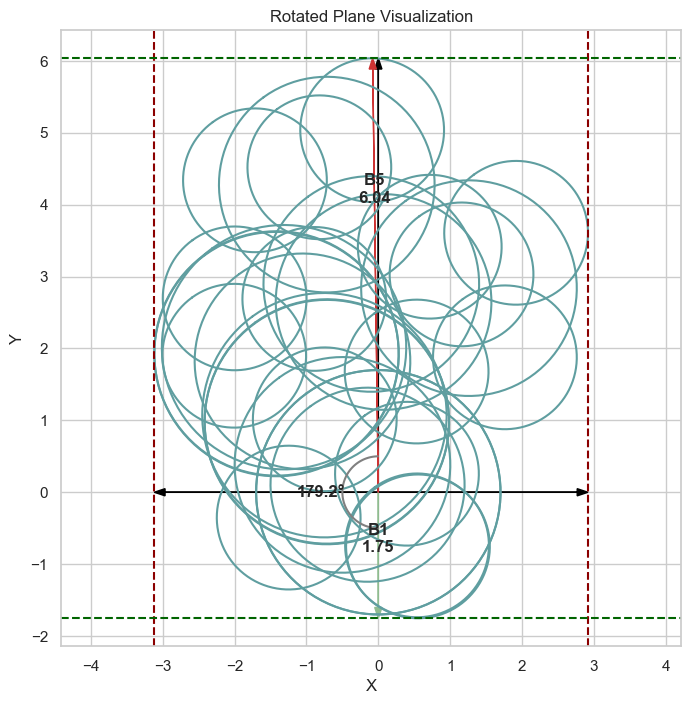

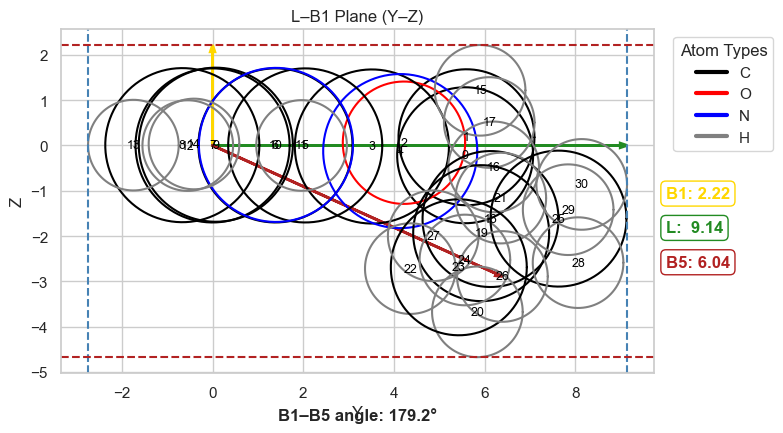

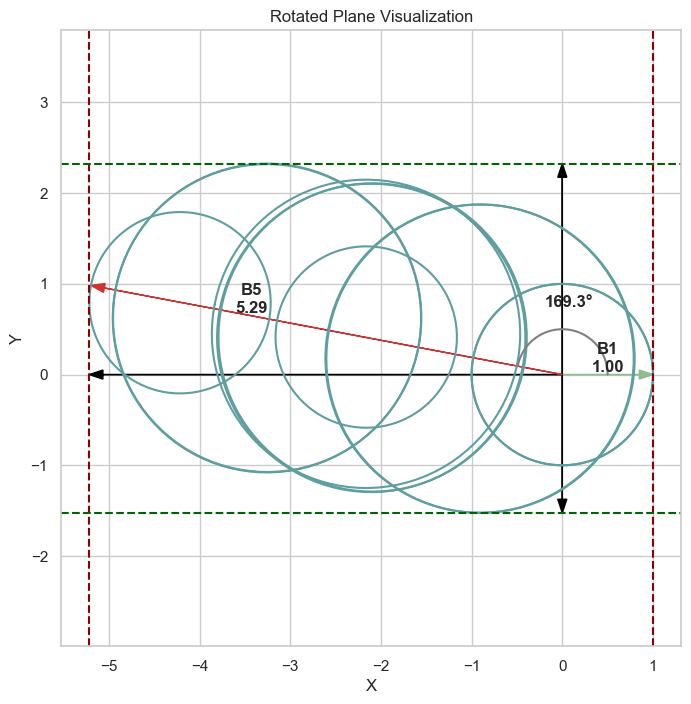

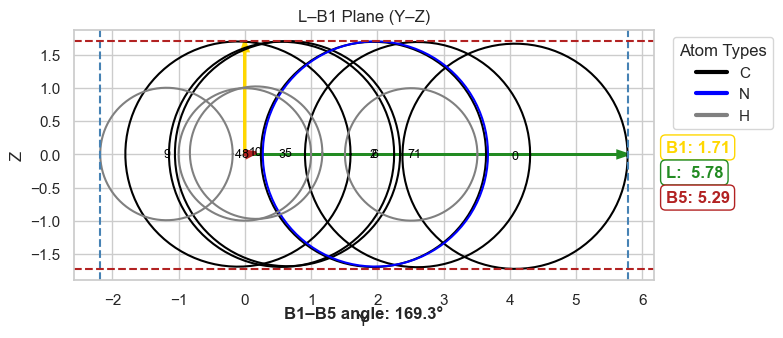

In [9]:
# sterimol_indices =[7,8]
sterimol_indices1 =[19,18]
sterimol_indices2 =[8,7]
# st_df=mols.get_sterimol_dict(sterimol_indices)

import matplotlib.pyplot as plt

st_df2=mols.molecules[0].get_sterimol(sterimol_indices2,visualize=True)
st_df1=mols.molecules[0].get_sterimol(sterimol_indices1,visualize=True)






In [14]:

from matplotlib import pyplot as plt
def plot_correlation_matrix(corr_matrix, title):
    """Plot a correlation matrix using matplotlib."""
    fig, ax = plt.subplots()
    cax = ax.imshow(corr_matrix, aspect='equal')
    # Set tick labels
    ax.set_xticks(range(len(corr_matrix.columns)))
    ax.set_xticklabels(corr_matrix.columns, rotation=90)
    ax.set_yticks(range(len(corr_matrix.index)))
    ax.set_yticklabels(corr_matrix.index)
    ax.set_title(title)
    # Add colorbar
    fig.colorbar(cax, ax=ax)
    plt.tight_layout()
    plt.show()




In [5]:
# df=mols.get_molecules_comp_set_app(answers_dict=None,answers_list_load=list_answers)
df=mols.get_molecules_comp_set_app(answers_dict=answers_dict,answers_list_load=None)


TypeError: get_molecules_comp_set_app() got an unexpected keyword argument 'answers_dict'

Shape of dip_df: (33, 28)
Shape of dip_df2: (33, 28)


TypeError: Invalid shape (28,) for image data

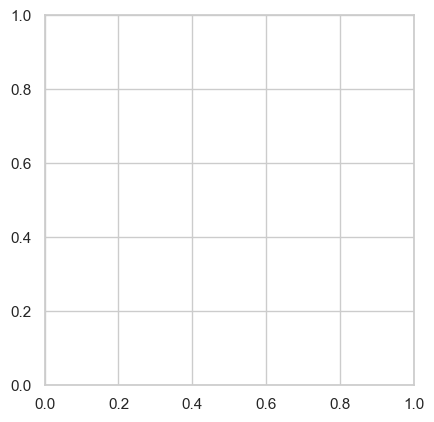

In [16]:
dipole_indices = [[11, 6, 4],[4,5,12],[11,12,5],[11,12,14],[1,5,12],[14,12,13],[13,12,5]]
dipole_df=mols.get_dipole_dict(dipole_indices,visualize_bool=False)
dip_df=dict_to_horizontal_df(dipole_df)
dip_df2=mols.get_dipole_dict(dipole_indices,origin=[6,7,8,9,10,11],visualize_bool=False)
dip_df2=dict_to_horizontal_df(dip_df2)
# compare the correlation between the two dipole dataframes
corr_matrix = dip_df.corrwith(dip_df2)
# print shapes of dipole dataframes
print(f"Shape of dip_df: {dip_df.shape}")
print(f"Shape of dip_df2: {dip_df2.shape}")

plot_correlation_matrix(corr_matrix, "Dipole Correlation Matrix")
# mols.molecules[0].get_dipole_gaussian_df(dipole_indices,visualize_bool=True)

First few rows of X-dipole:
           11-6-4    4-5-12   11-12-5  11-12-14     1-5-12   14-12-13   13-12-5
LS1621 -7.766860 -2.435918  3.360200 -3.362791 -10.683381  -9.897184  4.217297
LS1622 -5.127274 -4.798926  5.574201 -5.575276  -9.857999  -7.876075  6.257198
LS1630 -8.067573 -3.794452  4.792779 -4.791449 -12.229473 -10.839630  5.744495
LS1641 -9.641146 -0.529559  1.142262 -1.130219 -10.411166 -10.682015  3.205605
LS1642 -7.749533 -1.102943  1.532936 -1.559308  -8.983599  -8.821431  3.252700 



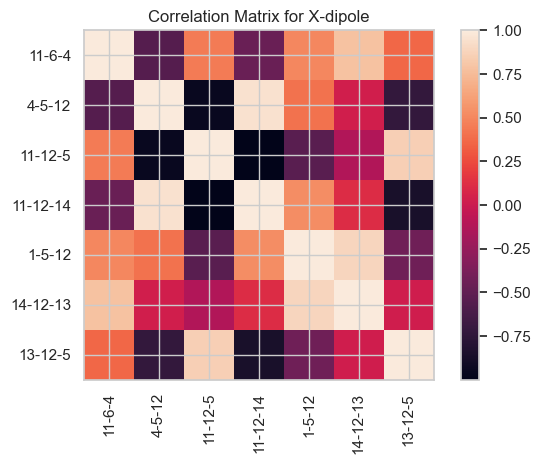

First few rows of Y-dipole:
           11-6-4     4-5-12    11-12-5   11-12-14    1-5-12  14-12-13  \
LS1621  7.296773 -10.314500 -10.191187 -10.191187  1.024725  4.100125   
LS1622  8.516328  -8.709047  -8.321639  -8.321639 -1.775714  6.159820   
LS1630  9.109420 -11.526639 -11.252821 -11.252821  0.080908  5.587402   
LS1641  4.948117 -10.510978 -11.164756 -11.164756  4.037364  3.221679   
LS1642  4.616659  -8.713479  -9.295079  -9.295079  2.789254  3.218049   

          13-12-5  
LS1621   9.855331  
LS1622   7.811314  
LS1630  10.770376  
LS1641  10.726763  
LS1642   8.837999   



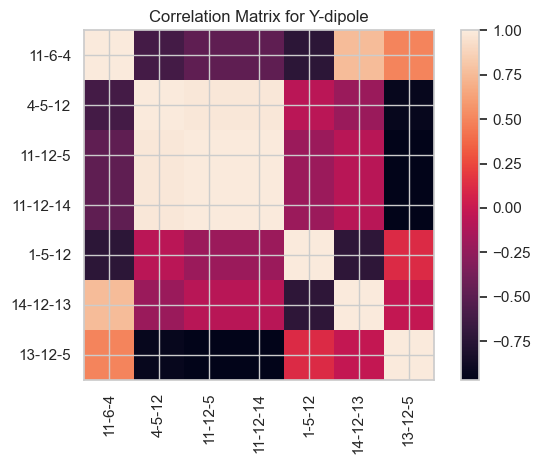

First few rows of Z-dipole:
           11-6-4    4-5-12   11-12-5  11-12-14    1-5-12  14-12-13   13-12-5
LS1621 -1.271997 -1.691861  0.183729 -0.127829  0.017301  0.647859  0.521395
LS1622 -1.231584 -1.206809  0.110408 -0.014505 -0.016982  0.598035  0.405501
LS1630 -1.237619 -1.528951 -0.047437  0.122463 -0.180019  0.939320  0.773793
LS1641 -2.919107 -3.898160 -0.013786  0.166003 -1.124298  1.213289  0.785737
LS1642 -2.733483 -3.420459  0.303879 -0.103902 -0.596448  0.816849  0.387885 



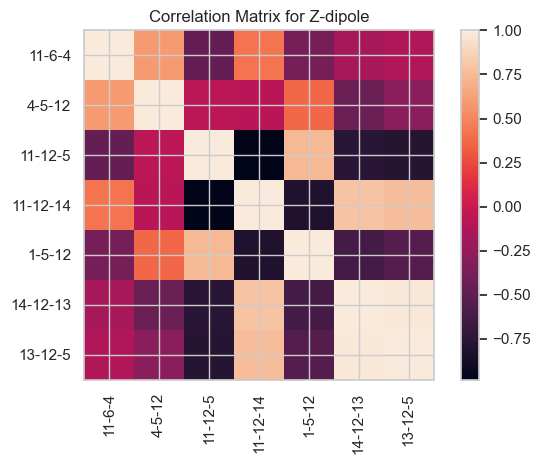

First few rows of Total-dipole:
          11-6-4   4-5-12  11-12-5  11-12-14   1-5-12  14-12-13  13-12-5
LS1621  10.7325  10.7325  10.7325   10.7325  10.7325   10.7325  10.7325
LS1622  10.0166  10.0166  10.0166   10.0166  10.0166   10.0166  10.0166
LS1630  12.2311  12.2311  12.2311   12.2311  12.2311   12.2311  12.2311
LS1641  11.2231  11.2231  11.2231   11.2231  11.2231   11.2231  11.2231
LS1642   9.4256   9.4256   9.4256    9.4256   9.4256    9.4256   9.4256 



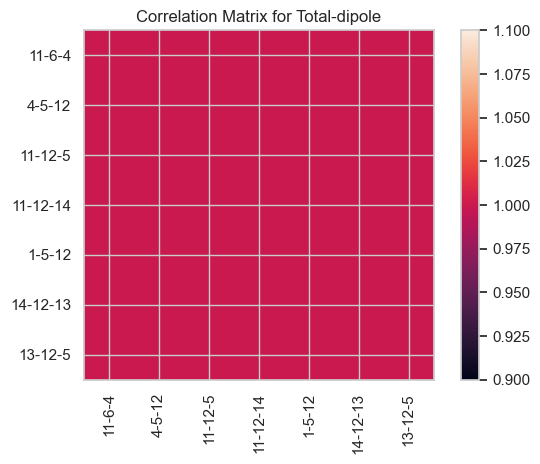

In [13]:
def split_dipole_components(df):
    """
    Split wide-form dipole columns into four separate DataFrames:
      - dx   : dipole_x_<group>    → columns = [<group>, …]
      - dy   : dipole_y_<group>    → …
      - dz   : dipole_z_<group>    → …
      - dtot : total_dipole_<group> → …
    """
    def pick_df(pattern):
        # case-insensitive substring match
        matches = [c for c in df.columns
                   if pattern.lower() in c.lower()]
        if not matches:
            print(f"[warn] no columns matched '{pattern}'.\navailable cols:\n  ",
                  ", ".join(df.columns))
        sub = df[matches].copy()
        # strip off exactly the pattern (case-insensitive)
        sub.columns = [c[len(pattern):] if c.lower().startswith(pattern.lower())
                       else c.replace(pattern, "")
                       for c in matches]
        return sub

    dx   = pick_df("dipole_x_")
    dy   = pick_df("dipole_y_")
    dz   = pick_df("dipole_z_")
    dtot = pick_df("total_dipole_")

    return dx, dy, dz, dtot

dx, dy, dz, dtotal = split_dipole_components(dip_df)

components = {
    "X-dipole":    dx,
    "Y-dipole":    dy,
    "Z-dipole":    dz,
    "Total-dipole": dtotal,
}

for name, comp_df in components.items():
    if comp_df.empty:
        print(f"-- skipping {name}: no columns found --\n")
        continue

    print(f"First few rows of {name}:\n", comp_df.head(), "\n")
    corr = comp_df.corr()
    plot_correlation_matrix(corr, title=f"Correlation Matrix for {name}")



In [14]:
new_dipole=df['dipole_z_10-11-12']

In [15]:
import os
os.chdir(r'C:\Users\edens\Documents\GitHub\lucas_project\new_update_logs')
df.to_csv('added_features_try34.csv', index=True)

Database already exists at: results_added_features.db
Table 'regression_results' has been ensured to exist.
linear model selected

--- Correlation Report ---
Features with correlation above 0.8:
['cross_angle', 'B1_20-9', 'total_dipole_10-11-12', 'para_angle', 'Cross_mag_Bending_22-23', 'buried_volume', 'B1_11-6', 'loc_B5_19-18', 'Frequency_Stretch_5_4', 'dipole_x_10-11-12', 'bite_angle_inverted', 'B1_19-18', 'L_11-6', 'hirshfeld_atom_12', 'bite_angle', 'total_dipole_5-1-25', 'loc_B5_1-5', 'cm5_atom_12', 'bond_length_12-14', 'Amplitude_Stretch_5_4']



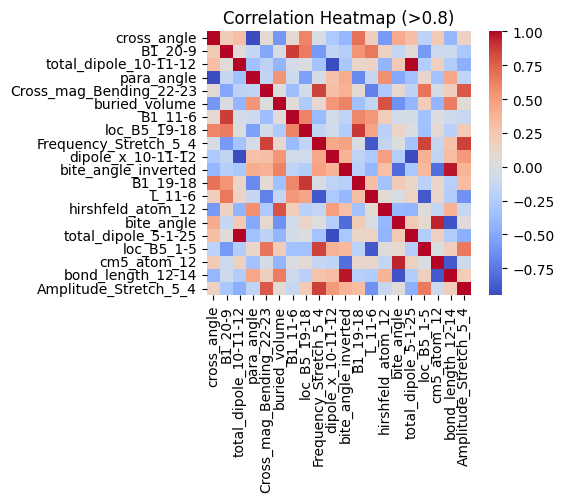


Correlated features were not dropped.

Left out samples:   ['LS1726', 'LS2004', 'LS1695', 'LS1663']
Remaining samples:  ['LS1621', 'LS1622', 'LS1630', 'LS1641', 'LS1642', 'LS1643', 'LS1661', 'LS1685', 'LS1687', 'LS1688', 'LS1689', 'LS1690', 'LS1696', 'LS1714', 'LS1715', 'LS1716', 'LS1717', 'LS1721', 'LS1723', 'LS1734', 'LS1736', 'LS2000', 'LS2001', 'LS2002', 'LS2003', 'LS2005', 'LS2006', 'LS2007', 'LS2008']


In [5]:
csv_path=r'C:\Users\edens\Documents\GitHub\Robert\added_features.csv'

# csv_path=r'C:\Users\edens\Documents\GitHub\lucas_project\new_update_logs\added_features_try34.csv'

csv_filepaths = {
'features_csv_filepath': csv_path,
'target_csv_filepath': ''
}
# ['LS2008','LS1643']
# ('B1_B5_angle_4-3', 'L_11-6', 'bond_length_11-12')
df=pd.read_csv(csv_path, index_col=0)

# df.drop(columns=['Unnamed: 0'], inplace=True, errors='ignore')
leave_out = [
    "LS1621", "LS1622", "LS1630", "LS1641", "LS1642", "LS1643",
    "LS1661", "LS1663", "LS1714", "LS1715", "LS1716", "LS1717",
    "LS1721", "LS1723", "LS1726", "LS1734", "LS1736",
    "LS2000", "LS2001", "LS2002", "LS2003", "LS2006", "LS2007", "LS2008"
]

# pick 4 random samples to leave out
leave_out = np.random.choice(df.index, size=2, replace=False).tolist()
leave_out=['LS1726', 'LS2004', 'LS1695', 'LS1663'] # 

Regression_model = LinearRegressionModel(csv_filepaths, process_method='one csv', output_name='output', leave_out=leave_out, min_features_num=2, max_features_num=None, metrics=None, return_coefficients=False)
# Regression_model.leave_out_samples(leave_out=leave_out, keep_only=True)
features_combination_1=['L_25-1', 'B5_19-18', 'L_19-18', 'loc_B5_1-5', 'HOMO-LUMO Gap (eV)']
features_combination_2=[ 'hirshfeld_atom_12','cm5_atom_5', 'bond_length_12-14','HOMO-LUMO Gap (eV)','bite_angle_inverted']
features_combination_3=[ 'hirshfeld_atom_12','cm5_atom_5', 'L_11-6','HOMO-LUMO Gap (eV)']
features=['B1_B5_angle_25-1', 'loc_B5_1-5', 'cm5_atom_5', 'bond_length_12-14']
# 0   LS1726  0.277339   0.215294   22.371802
# 1   LS2004  1.881808   0.715195   61.994283
# 2   LS1695  0.981880   0.120586   87.718864
# 3   LS1663  1.743479   0.100025   94.262930

# ('B1_B5_angle_4-3', 'L_11-6', 'bond_length_11-12')
# x=Regression_model.check_linear_regression_assumptions()
# Regression_model.fit_and_evaluate_combinations()
# plot.generate_and_display_q2_scatter_plot(Regression_model,['dipole_z_10-11-12', 'hirshfeld_atom_12', 'HOMO-LUMO Gap (eV)'])


In [9]:
os.chdir(r'C:\Users\edens\Documents\GitHub\lucas_project\new_update_logs')
print(os.listdir())


['added_features.csv', 'added_features_try3.csv', 'added_features_try34.csv', 'combined_features1.csv', 'combined_features_new.csv', 'compset_charges.csv', 'comp_set_app1.csv', 'comp_set_app2.csv', 'cube', 'CURATE', 'edit.xyz', 'feather_files', 'Files to fix TertButyl Side.txt', 'GENERATE', 'modeling.py', "model_plot_['B1_B5_angle_4-3', 'L_11-6', 'bond_length_11-12', 'bite_angle_inverted'].png", "model_plot_['B1_B5_angle_4-3', 'L_11-6', 'bond_length_11-12'].png", "model_plot_['B5_6-4', 'bond_length_11-12', 'HOMO-LUMO Gap (eV)'].png", "model_plot_['bond_length_12-14', 'bite_angle', 'HOMO-LUMO Gap (eV)'].png", "model_plot_['cm5_atom_5', 'cone_angle', 'bite_angle'].png", "model_plot_['cone_angle', 'bite_angle', 'HOMO-LUMO Gap (eV)'].png", "model_plot_['cross_angle', 'dipole_y_10-11-12', 'dip_y_NPA_11-6-4', 'L_11-6'].png", "model_plot_['Cross_mag_Bending_22-23', 'dipole_z_10-11-12', 'hirshfeld_atom_12', 'bond_length_12-14'].png", "model_plot_['Cross_mag_Bending_22-23', 'hirshfeld_atom_12',

In [7]:
df=pd.read_csv('results_combined_features_new.csv')
# remove NaN
df = df.dropna()    
import ast
# organize by r2
df = df.sort_values(by='r2', ascending=False)
print(df.columns,df.head())
# save a list of the top 10 combinations
top_10_combinations = df.head(10)['combination'].tolist()

list_of_lists = [list(ast.literal_eval(s)) for s in top_10_combinations]
print(list_of_lists)

FileNotFoundError: [Errno 2] No such file or directory: 'results_combined_features_new.csv'

In [ ]:

x=[]
y='B5_21-1'
comb=['hirshfeld_atom_12','dipole_z_10-11-12']
# for lab in labels:
#     x.append([lab,'hirshfeld_atom_12','dipole_z_10-11-12'])

Starting generate_and_display_q2_scatter_plot...
Extracting features from model.features_df...
Extraction complete. X shape: (29, 2), y shape: (29,)
Fitting the model...
Model fitted successfully.
Generating predictions with covariance calculation...
Predictions generated. pred shape: (29,)
Retrieving coefficient estimates...
Coefficient estimates retrieved:
                   Estimate  Std. Error    t value       p value
(Intercept)        0.968435    0.077387  12.514172  1.644684e-12
hirshfeld_atom_12  0.620096    0.077419   8.009616  1.729508e-08
dipole_z_10-11-12  0.260463    0.077419   3.364335  2.390089e-03
Calculating cross-validation metrics for 3-fold CV...
3-fold CV metrics: Q2: 0.695328179379749, MAE: 0.3607878583326945, RMSD: 0.44058394789133665
Calculating cross-validation metrics for 5-fold CV...
5-fold CV metrics: Q2: 0.7020400657190803, MAE: 0.35140625068286624, RMSD: 0.43163407500112916
Calculating cross-validation metrics for LOOCV...
LOOCV metrics: Q2: 0.706904441717

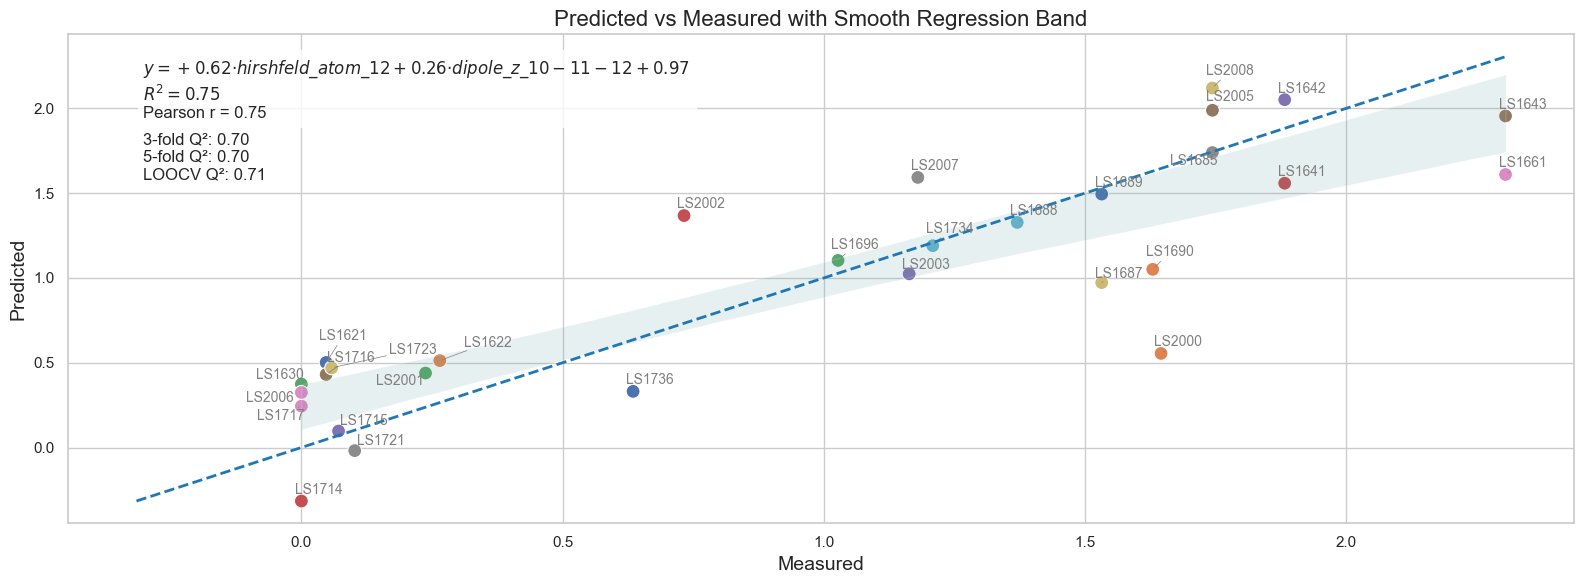

Plot generated successfully.
Finished generate_and_display_q2_scatter_plot.


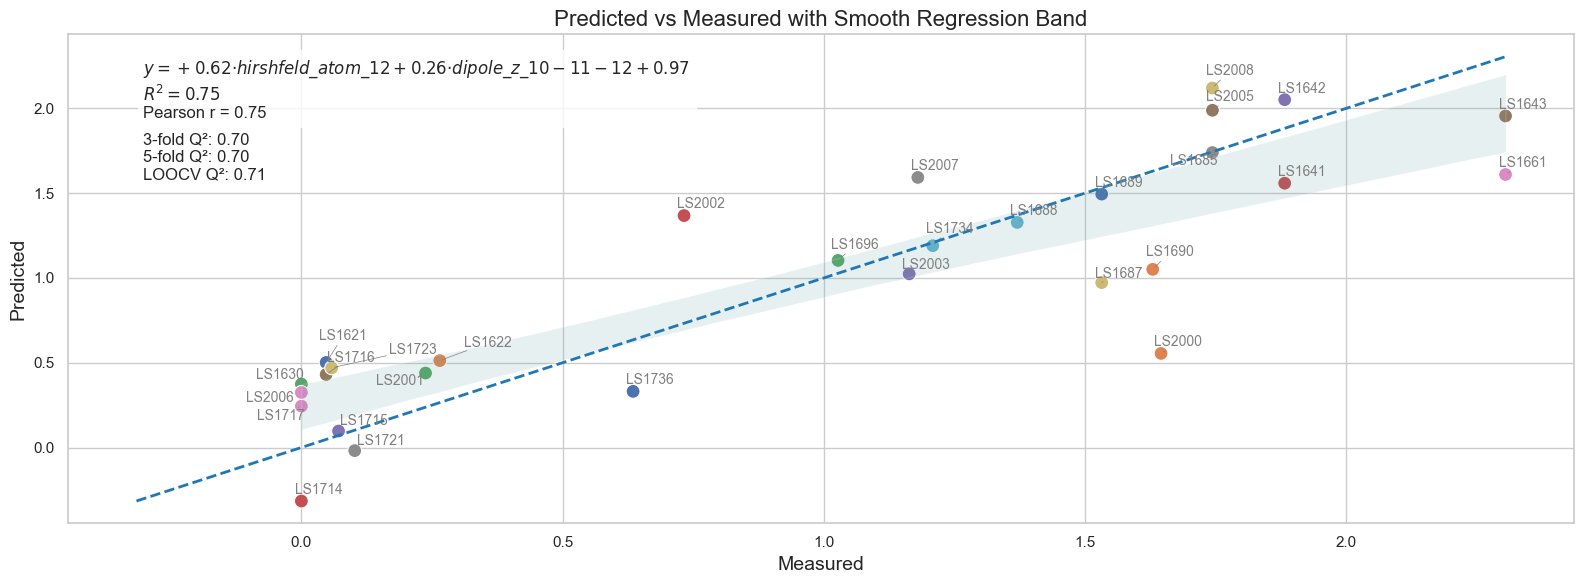

In [7]:

# for combination in x:
plot.generate_and_display_q2_scatter_plot(Regression_model,comb)

In [8]:
Regression_model.replace_rows(df)

=== Starting replace_rows ===


KeyError: '[21, 28, 13, 7] not found in axis'

Starting generate_and_display_q2_scatter_plot...
Extracting features from model.features_df...
Extraction complete. X shape: (29, 2), y shape: (29,)
Fitting the model...
Model fitted successfully.
Generating predictions with covariance calculation...
Predictions generated. pred shape: (29,)
Retrieving coefficient estimates...
Coefficient estimates retrieved:
                   Estimate  Std. Error    t value       p value
(Intercept)        0.968435    0.077387  12.514172  1.644684e-12
hirshfeld_atom_12  0.620096    0.077419   8.009616  1.729508e-08
dipole_z_10-11-12  0.260463    0.077419   3.364335  2.390089e-03
Calculating cross-validation metrics for 3-fold CV...
3-fold CV metrics: Q2: 0.695328179379749, MAE: 0.3607878583326945, RMSD: 0.44058394789133665
Calculating cross-validation metrics for 5-fold CV...
5-fold CV metrics: Q2: 0.7020400657190803, MAE: 0.35140625068286624, RMSD: 0.43163407500112916
Calculating cross-validation metrics for LOOCV...
LOOCV metrics: Q2: 0.706904441717

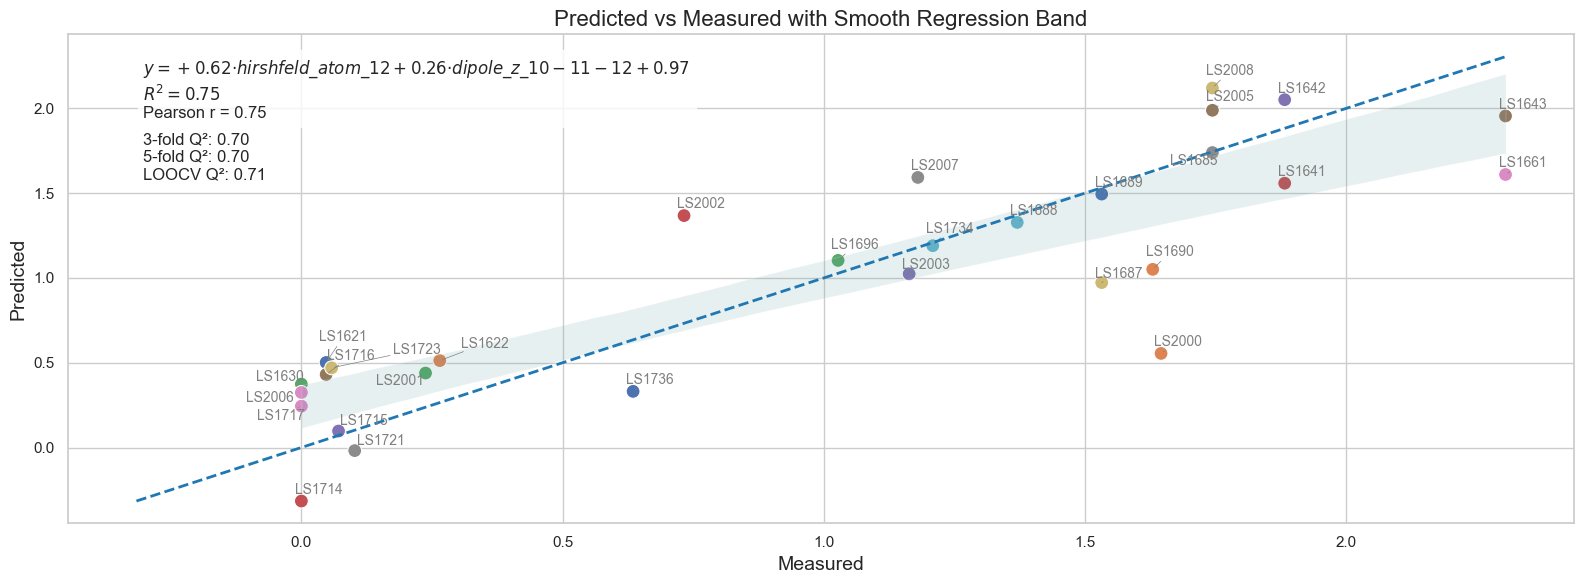

Plot generated successfully.
Finished generate_and_display_q2_scatter_plot.


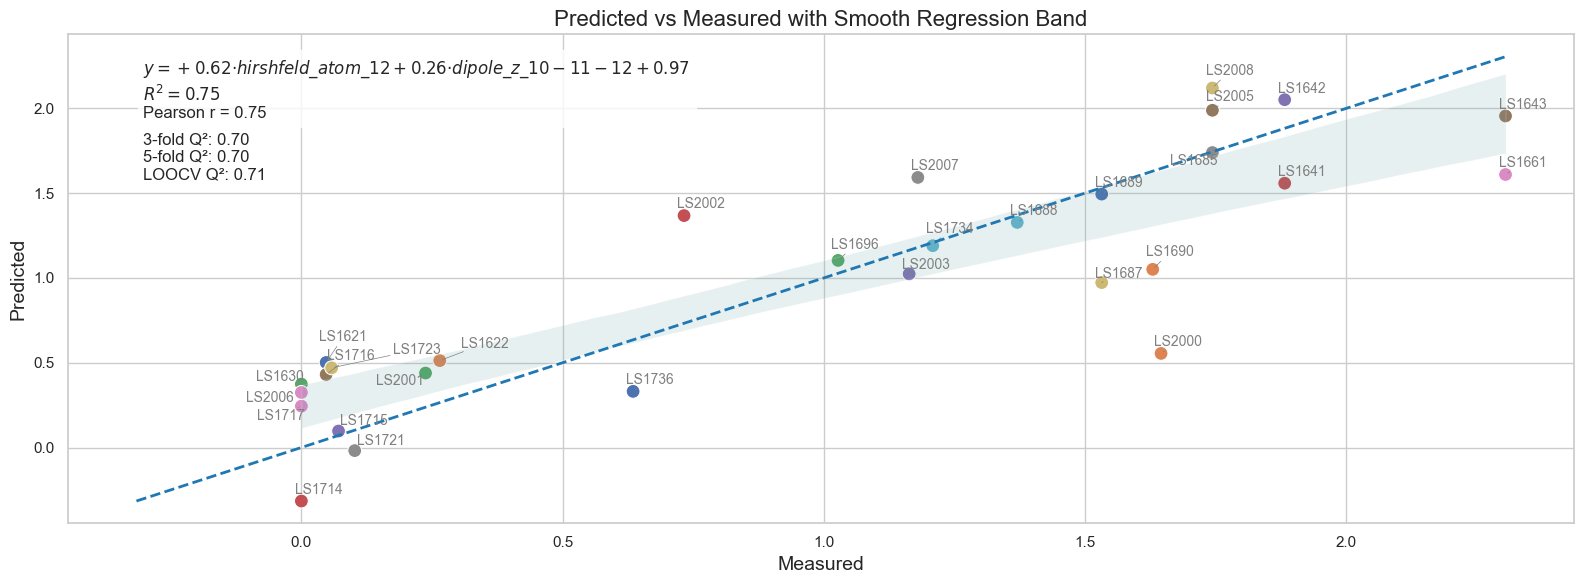

In [16]:
comb2=['dipole_z_10-11-12', 'hirshfeld_atom_12','bond_length_12-14','HOMO-LUMO Gap (eV)']
plot.generate_and_display_q2_scatter_plot(Regression_model,comb)

In [ ]:
features=['dipole_z_10-11-12', 'hirshfeld_atom_12', 'HOMO-LUMO Gap (eV)','B5_19-18']
features_combination_1=['L_25-1', 'B5_19-18', 'L_19-18', 'loc_B5_1-5', 'HOMO-LUMO Gap (eV)']
features_combination_2=[ 'hirshfeld_atom_12','cm5_atom_5', 'bond_length_12-14','HOMO-LUMO Gap (eV)','bite_angle_inverted']
features_combination_3=[ 'hirshfeld_atom_12','cm5_atom_5', 'L_11-6','HOMO-LUMO Gap (eV)']
featuressss=['B1_B5_angle_25-1', 'loc_B5_1-5', 'cm5_atom_5', 'bond_length_12-14']
# new_dipole=pd.DataFrame(new_dipole)
Regression_model.add_features(new_dipole)
# plot.generate_and_display_q2_scatter_plot(Regression_model,features)

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- Amplitude_Stretch_5_4
- B1_1-5
- B1_11-6
- B1_19-18
- B1_20-9
- ...


In [ ]:
Regression_model.leftout_samples
Regression_model.molecule_names_predict
# print the appropriate names for the index
Regression_model.predict


['LS1717', 'LS1690', 'LS1661', 'LS1663']

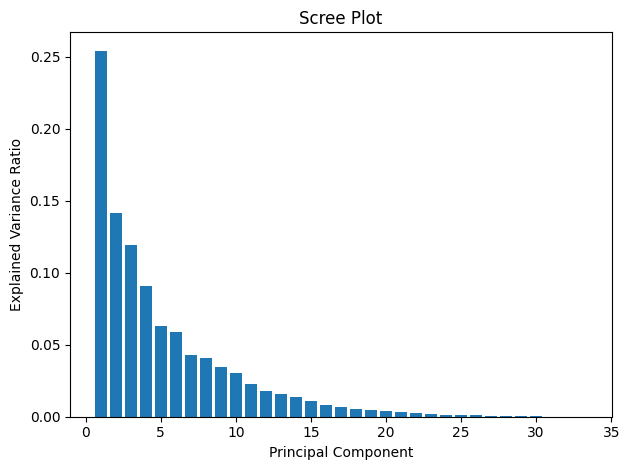

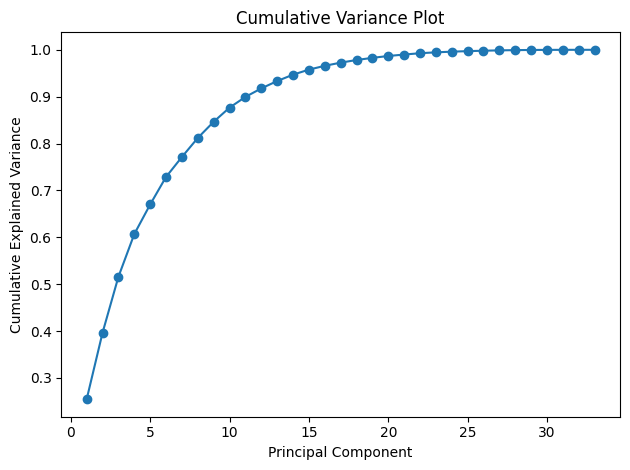

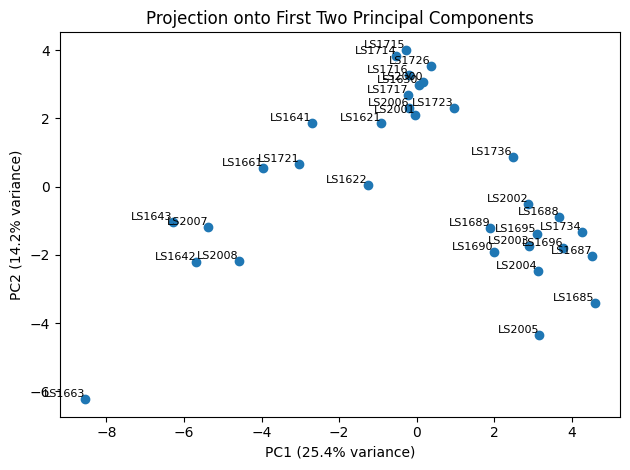

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
os.chdir(r'C:\Users\edens\Documents\GitHub\Robert')
# Load the dataset
df = pd.read_csv(r'C:\Users\edens\Documents\GitHub\Robert\added_features.csv')


# Extract sample identifiers (non-numeric first column)
sample_names = df.select_dtypes(exclude=[np.number]).iloc[:, 0]

# Select only numeric columns (features and output)
numeric_df = df.select_dtypes(include=[np.number])

# Separate features by dropping the last numeric column (output)
features = numeric_df.iloc[:, :-1]
# save the output column
output = numeric_df.iloc[:, -1]
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Variance explained by each component
explained_ratio = pca.explained_variance_ratio_
pc1_var = explained_ratio[0] * 100
pc2_var = explained_ratio[1] * 100

# 1) Scree Plot
plt.figure()
plt.bar(range(1, len(explained_ratio) + 1), explained_ratio)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.tight_layout()

# 2) Cumulative Variance Plot
cum_ratio = explained_ratio.cumsum()
plt.figure()
plt.plot(range(1, len(cum_ratio) + 1), cum_ratio, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Variance Plot')
plt.tight_layout()

# 3) Scatter Plot of PC1 vs PC2 with variance and sample labels
plt.figure()
plt.scatter(X_pca[:, 0], X_pca[:, 1])
for i, name in enumerate(sample_names):
    plt.text(X_pca[i, 0], X_pca[i, 1], name, fontsize=8, ha='right', va='bottom')
plt.xlabel(f'PC1 ({pc1_var:.1f}% variance)')
plt.ylabel(f'PC2 ({pc2_var:.1f}% variance)')
plt.title('Projection onto First Two Principal Components')
plt.tight_layout()
plt.show()

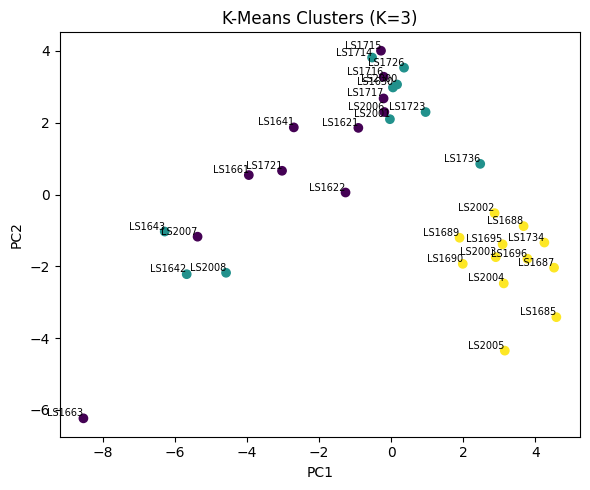

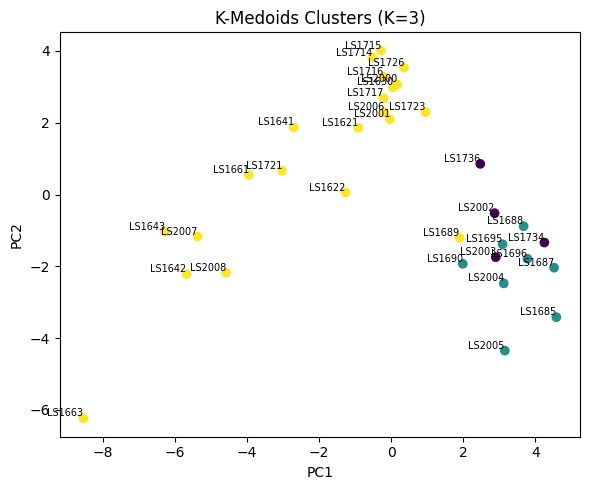

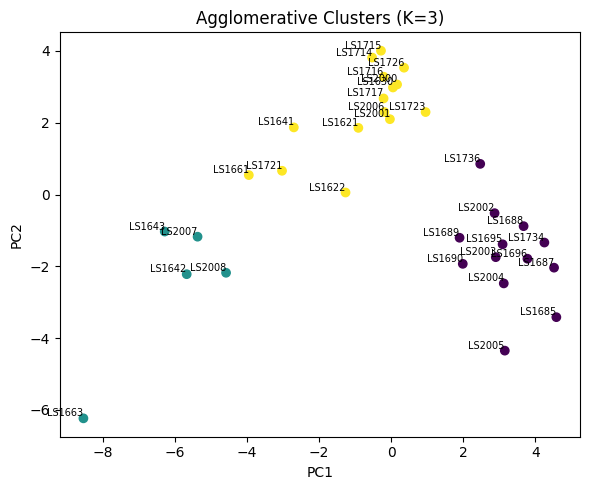

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import pairwise_distances
sample_names = df.select_dtypes(exclude=[np.number]).iloc[:, 0]
numeric_df = df.select_dtypes(include=[np.number])
features = numeric_df.iloc[:, :-1]
## drop output column
try:
    features = features.drop(columns=['output'])
except KeyError:
    pass    
# Standardize features
X_scaled = StandardScaler().fit_transform(features)

# PCA for visualization
X_pca2 = PCA(n_components=2, random_state=0).fit_transform(X_scaled)

# Number of clusters
K = 3

# K-Means
labels_km = KMeans(n_clusters=K, random_state=0).fit_predict(X_scaled)

# K-Medoids (PAM implementation)
def kmedoids_pam(X, K, max_iter=100):
    n = X.shape[0]
    medoids = np.random.choice(n, K, replace=False)
    for _ in range(max_iter):
        # Assign to nearest medoid
        D = pairwise_distances(X, X[medoids])
        labels = np.argmin(D, axis=1)
        new_medoids = medoids.copy()
        # Update medoids for each cluster
        for i in range(K):
            cluster_idx = np.where(labels == i)[0]
            if len(cluster_idx) == 0:
                continue
            intra_D = pairwise_distances(X[cluster_idx], X[cluster_idx])
            total_dist = intra_D.sum(axis=1)
            new_medoids[i] = cluster_idx[np.argmin(total_dist)]
        if np.array_equal(new_medoids, medoids):
            break
        medoids = new_medoids
    # Final assignment
    D = pairwise_distances(X, X[medoids])
    return np.argmin(D, axis=1)

labels_kmed = kmedoids_pam(X_scaled, K)

# Agglomerative Clustering
labels_hc = AgglomerativeClustering(n_clusters=K, linkage='ward').fit_predict(X_scaled)

# Results table
results = pd.DataFrame({
    'Sample': sample_names,
    'KMeans': labels_km,
    'KMedoids': labels_kmed,
    'Agglomerative': labels_hc
})


# Plotting helper
def plot_clusters(X, labels, title):
    plt.figure(figsize=(6, 5))
    plt.scatter(X[:, 0], X[:, 1], c=labels)
    for i, name in enumerate(sample_names):
        plt.text(X[i,0], X[i,1], name, fontsize=7, ha='right', va='bottom')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title(title)
    plt.tight_layout()

# Plots
plot_clusters(X_pca2, labels_km, 'K-Means Clusters (K=3)')
plot_clusters(X_pca2, labels_kmed, 'K-Medoids Clusters (K=3)')
plot_clusters(X_pca2, labels_hc, 'Agglomerative Clusters (K=3)')
plt.show()

In [3]:
import re

lsd=["Strech Threshold - default is 1600 for carbonyl stretch",
                "Bending Vibration atoms - enter atom pairs that have a common atom: \n example: 4,7",
                "Bending Threshold - default is 1600 "]
for question in lsd:
    if re.search(r'threshold', question.lower(), re.IGNORECASE):
        continue
    else: 
        print('x')

x


In [3]:
os.chdir(r'C:\Users\edens\Documents\GitHub\smiles_data\Nadeem_feathers')
df = pd.read_feather('MD-25_optimized.feather')
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116
0,34.0,NaN,NaN,NaN,-3.5495,-5.0962,0.4412,6.2262,204.861,252.49,-0.58832,-0.306992,-0.354133,16.1270,0.0006,-0.02,0.00,-0.14,-0.01,0.00,-0.08,-0.01,0.00,-0.06,-0.02,0.00,-0.10,0.00,0.00,0.00,0.00,-0.01,0.01,0.01,-0.02,0.04,0.00,-0.03,-0.02,0.02,0.06,0.22,0.00,0.02,0.00,0.00,0.04,-0.01,0.01,0.00,0.05,0.01,0.00,0.04,0.02,0.00,0.10,0.02,0.00,0.10,0.01,0.00,0.04,0.00,0.00,-0.02,0.00,0.00,-0.02,0.02,0.04,0.22,-0.01,0.07,0.02,0.03,0.11,0.39,0.00,-0.02,0.01,-0.02,-0.04,-0.22,0.00,0.05,-0.04,0.02,0.00,0.10,0.03,0.00,0.15,0.03,0.00,0.15,0.01,0.00,0.04,-0.01,0.00,-0.07,-0.02,-0.06,-0.21,0.04,0.08,0.40,0.00,-0.03,0.01,-0.04,-0.11,-0.39,-0.04,-0.07,-0.39
1,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.49254,0.111552,0.144743,28.0790,0.0021,-0.12,0.01,-0.03,-0.07,-0.02,-0.01,-0.06,-0.08,0.01,-0.10,-0.11,0.02,0.00,-0.11,0.03,0.00,-0.17,0.04,-0.02,-0.18,0.04,0.03,-0.17,0.05,0.10,0.01,-0.01,-0.01,-0.07,0.02,0.01,-0.19,0.05,0.05,-0.08,0.03,0.05,-0.02,0.01,0.11,0.01,0.01,0.11,0.08,-0.01,0.05,0.11,-0.03,-0.01,0.08,-0.03,-0.01,0.02,-0.01,0.09,0.13,-0.04,0.07,-0.24,0.02,0.19,-0.04,-0.01,-0.03,0.19,-0.04,-0.12,-0.01,0.02,-0.05,-0.24,0.11,0.09,-0.11,0.04,0.16,-0.01,0.02,0.16,0.10,-0.01,0.05,0.16,-0.05,-0.05,0.11,-0.05,-0.14,0.12,-0.01,0.17,0.19,-0.06,-0.04,0.29,-0.06,-0.23,0.16,-0.01,-0.21,-0.06,0.04
2,O,3.130753,2.772714,0.002761,NaN,NaN,NaN,NaN,NaN,NaN,-0.36770,-0.090290,-0.132874,41.0538,0.0050,-0.02,-0.01,-0.08,-0.01,0.00,0.00,0.01,0.01,0.10,0.01,0.01,0.08,0.01,0.01,0.19,0.01,0.01,0.19,0.01,0.00,0.23,0.00,-0.03,0.15,0.02,0.01,-0.02,0.05,0.04,0.06,0.06,0.08,0.14,0.01,0.01,0.21,-0.01,0.00,0.09,-0.02,-0.01,0.06,-0.05,-0.01,-0.09,-0.06,-0.02,-0.21,-0.05,-0.02,-0.17,-0.02,-0.01,-0.02,0.00,-0.04,-0.15,0.08,0.12,0.19,0.01,0.02,0.01,0.00,-0.05,-0.19,0.05,0.02,0.02,0.09,0.10,0.11,0.01,0.01,0.26,-0.01,0.00,0.15,-0.06,-0.02,-0.11,-0.08,-0.03,-0.33,-0.06,-0.02,-0.26,0.03,-0.02,-0.11,-0.02,-0.06,-0.21,-0.01,-0.09,-0.29,0.04,-0.04,-0.14,0.08,0.05,0.07
3,C,2.519342,1.722728,0.112652,NaN,NaN,NaN,NaN,NaN,NaN,0.22967,0.045607,0.105880,53.1047,0.0054,-0.09,-0.02,-0.06,-0.05,-0.04,-0.02,-0.04,-0.09,0.01,-0.07,-0.10,0.02,0.00,-0.11,0.01,0.00,-0.13,0.02,0.02,-0.21,0.25,0.00,-0.31,-0.15,-0.09,0.07,-0.06,-0.02,0.13,-0.04,-0.03,0.19,-0.07,0.03,-0.09,0.00,0.03,-0.04,0.00,0.08,-0.02,0.03,0.08,0.02,0.04,0.04,0.05,0.03,0.00,0.02,0.01,-0.01,-0.02,-0.01,-0.08,-0.01,-0.01,-0.05,0.39,0.11,-0.16,0.09,-0.10,0.00,-0.03,0.05,0.06,0.10,0.01,-0.02,0.28,-0.31,0.06,-0.10,0.01,0.11,-0.04,0.03,0.12,0.04,0.06,0.05,0.08,0.05,-0.03,0.04,0.00,0.08,0.03,0.06,-0.14,-0.05,-0.03,0.01,-0.09,0.08,0.15,0.01,0.11,0.12,0.14,0.03
4,C,1.090996,1.651325,0.363223,NaN,NaN,NaN,NaN,NaN,NaN,0.24567,0.062148,0.115415,92.9320,0.0253,-0.05,0.00,0.11,-0.05,0.00,0.06,-0.06,0.00,-0.01,-0.08,0.00,-0.10,-0.05,0.00,0.02,-0.06,-0.02,-0.11,-0.10,-0.02,-0.16,-0.13,-0.01,-0.13,0.08,-0.02,-0.11,0.06,-0.04,-0.18,0.06,-0.04,-0.17,-0.03,0.00,0.15,-0.04,0.00,0.11,-0.03,0.00,0.12,-0.06,0.00,-0.02,-0.08,0.00,-0.14,-0.08,0.00,-0.10,-0.05,0.00,0.03,0.11,0.03,0.08,0.09,-0.04,-0.16,0.08,-0.03,-0.16,0.13,0.06,0.19,0.08,-0.02,-0.11,0.09,-0.04,-0.14,-0.03,0.00,0.16,-0.02,0.00,0.20,-0.06,0.00,-0.03,-0.10,0.01,-0.26,-0.09,0.00,-0.17,0.11,0.03,0.07,0.13,0.05,0.16,0.16,0.10,0.35,0.12,0.05,0.14,0.07,-0.04,-0.17


In [4]:
m=Molecules(r'C:\Users\edens\Documents\GitHub\smiles_data\Nadeem_feathers')

Molecules Loaded: ['HHQ_optimized.feather', 'MD-106_optimized.feather', 'MD-108_optimized.feather', 'MD-124_optimized.feather', 'MD-125_optimized.feather', 'MD-24_optimized.feather', 'MD-25_optimized.feather', 'MD-28_optimized.feather', 'MD-37_optimized.feather', 'MD-38_optimized.feather', 'MD-41_optimized.feather', 'MD-42_optimized.feather', 'MD-48_target.feather', 'MD-61_optimized.feather', 'MD-66_optimized.feather', 'MD-68_optimized.feather', 'MD-71_optimized.feather', 'MD-74_optimized.feather', 'MD-75_optimized.feather', 'MD-77_optimized.feather', 'MD-83_optimized.feather', 'MD-87_optimized.feather', 'ME-10_optimized.feather', 'ME-17_optimized.feather', 'ME-18_optimized.feather', 'ME-1_optimized.feather', 'ME-22_optimized.feather', 'ME-27_optimized.feather', 'ME-2_optimized.feather', 'ME-5_optimized.feather', 'ME-7_optimized.feather', 'ME-8_optimized.feather', 'PQS_optimized.feather'] Failed Molecules: []


In [6]:
m.molecules[6].xyz_df

,atom,x,y,z
0,O,3.130753,2.772714,0.002761
1,C,2.519342,1.722728,0.112652
2,C,1.090996,1.651325,0.363223
3,H,0.547207,2.580431,0.458519
4,C,0.438942,0.470830,0.476840
5,C,-1.042087,0.361156,0.681827
6,H,-1.423587,1.320821,1.029000
7,H,-1.258496,-0.372482,1.464599
8,C,-4.068643,0.996029,-0.522982
9,C,-3.263484,-0.131175,-0.385515
